In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import OneHotEncoder


## General settings for Pandas

In [2]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show the full length of cell contents
pd.set_option('display.expand_frame_repr', False)  # Prevent multi-line output for wide DataFrames

# Settings for Jupyter to avoid "scrollable" mode
InteractiveShell.ast_node_interactivity = "all"


# Import and general stats

In [3]:
car_price_df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/CarPrice/CarPrice_Assignment.csv')


In [4]:
car_price_df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
print(car_price_df['aspiration'].value_counts()) 


aspiration
std      168
turbo     37
Name: count, dtype: int64


In [ ]:
# Select only non-numeric columns
categorical_columns = car_price_df.select_dtypes(exclude=['number']).columns

# Create a dictionary to store the value counts of each categorical column
value_counts_dict = {col: car_price_df[col].value_counts() for col in categorical_columns}

# Display the results to the user
for col, value_counts in value_counts_dict.items():
    print(f"{'-'*10} {col} {'-'*10}")
    print(value_counts, "\n")


# Data Preprocessing

## Conversion : cylindernumber to numeric

In [8]:
# Convert the `cylindernumber` column to an integer column
def convert_cylindernumber_to_int(cylindernumber):
    if cylindernumber == "two":
        return 2
    elif cylindernumber == "three":
        return 3
    elif cylindernumber == "four":
        return 4
    elif cylindernumber == "five":
        return 5
    elif cylindernumber == "six":
        return 6
    elif cylindernumber == "eight":
        return 8
    elif cylindernumber == "twelve":
        return 12
    else:
        return
    
# Apply the function to the `cylindernumber` column
car_price_df["cylindernumber_int"] = car_price_df["cylindernumber"].apply(convert_cylindernumber_to_int)


## Conversion : One Hot Encoder for Fueltype - Carbody - Drivewheel

In [ ]:
# Initialize Encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' evita la multicollinearità

# Apply encoder
encoded_array = encoder.fit_transform(car_price_df[['fueltype']])

# Create new_df with encoded columns
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['fueltype']))

# Concatenare con il DataFrame originale (se necessario)
car_price_df = pd.concat([car_price_df, encoded_df], axis=1)

# Mostriamo il risultato
print(car_price_df[['fueltype', 'fueltype_gas']].head())


  fueltype  fueltype_gas
0      gas           1.0
1      gas           1.0
2      gas           1.0
3      gas           1.0
4      gas           1.0


In [10]:
categorical_cols = ['carbody', 'drivewheel']
for categorical_col in categorical_cols:
    # Initialize Encoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
    
    # Apply encoder
    encoded_array = encoder.fit_transform(car_price_df[[categorical_col]])
    
    # Create new_df with encoded columns
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([categorical_col]))
    
    # Concatenate with the original DataFrame
    car_price_df = pd.concat([car_price_df, encoded_df], axis=1)
    
    # Drop the original column
    # car_price_df.drop(columns=[categorical_col], inplace=True)


In [11]:
car_price_df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernumber_int,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,4,0.0,0.0,0.0,0.0,0.0,1.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,4,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,6,0.0,1.0,0.0,0.0,0.0,1.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,4,0.0,0.0,1.0,0.0,1.0,0.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,5,0.0,0.0,1.0,0.0,0.0,0.0


# Data Exploration

## Car Price

### Car price : Histogram

In [12]:
bins_edges = np.linspace(5_000, 50_000, 19)
print(bins_edges)


[ 5000.  7500. 10000. 12500. 15000. 17500. 20000. 22500. 25000. 27500.
 30000. 32500. 35000. 37500. 40000. 42500. 45000. 47500. 50000.]


<Figure size 1000x500 with 0 Axes>

(array([44., 56., 23., 18., 23., 15.,  5.,  3.,  1.,  2.,  4.,  3.,  5.,
         0.,  2.,  0.,  1.,  0.]),
 array([ 5000.,  7500., 10000., 12500., 15000., 17500., 20000., 22500.,
        25000., 27500., 30000., 32500., 35000., 37500., 40000., 42500.,
        45000., 47500., 50000.]),
 <BarContainer object of 18 artists>)

Text(0.5, 0, 'prezzo macchina')

Text(0, 0.5, 'numero macchine')

Text(0.5, 1.0, 'Istogramma prezzo macchine con Quartili')

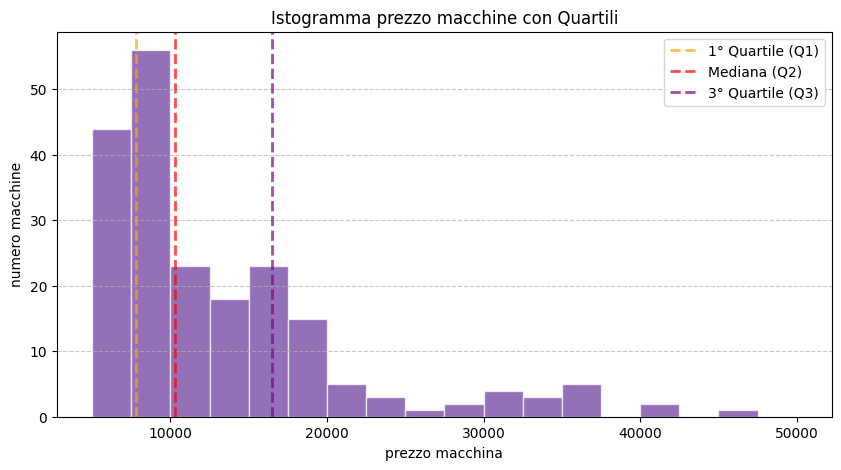

In [13]:
col_price = car_price_df['price']
bins_edges = np.linspace(5_000, 50_000, 19)  # linspace selects 19 equidistant points, thus 18 bins
q1, q2, q3 = np.percentile(col_price, [25, 50, 75])

# Create the histogram
plt.figure(figsize=(10, 5))
plt.hist(col_price,
         bins=bins_edges,
         color="rebeccapurple",
         edgecolor="white", alpha=0.7)

# Add lines for quartiles
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)", alpha=0.7)
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)", alpha=0.7)
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)", alpha=0.7)

# Add labels and title
plt.xlabel("prezzo macchina")
plt.ylabel("numero macchine")
plt.title("Istogramma prezzo macchine con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Car price : Diesel vs. Gas

In [14]:
# Divide the dataset into two groups based on the `fueltype` column
gas_price = car_price_df[car_price_df['fueltype'] == 'gas']['price']
diesel_price = car_price_df[car_price_df['fueltype'] == 'diesel']['price']


Text(0.5, 0.98, 'Prezzo per tipo di carburante')

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Gas Price')

Text(0.5, 0, 'gas')

Text(0, 0.5, 'price')

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Diesel Price')

Text(0.5, 0, 'diesel')

Text(0, 0.5, 'price')

(0.0, 53.55)

(0.0, 53.55)

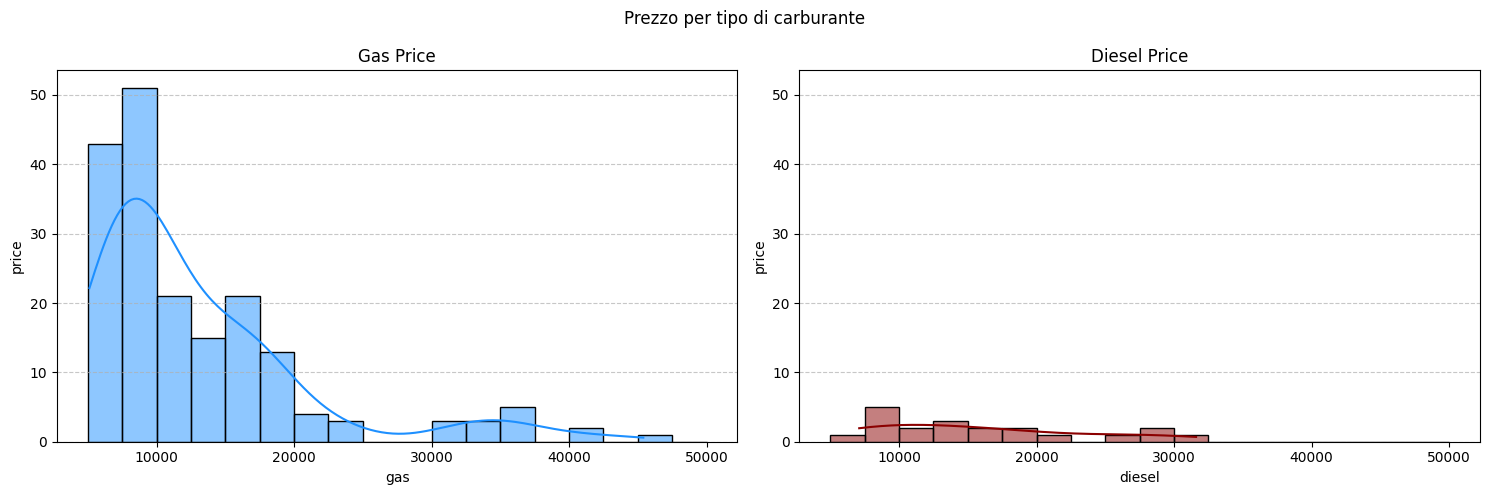

In [15]:
# Create a boxplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Prezzo per tipo di carburante')

sns.histplot(gas_price, ax=axes[0], kde=True, color='dodgerblue', bins=bins_edges)
axes[0].set_title('Gas Price')
axes[0].set_xlabel('gas')
axes[0].set_ylabel('price')
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

sns.histplot(diesel_price, ax=axes[1], kde=True, color='darkred', bins=bins_edges)
axes[1].set_title('Diesel Price')
axes[1].set_xlabel('diesel')
axes[1].set_ylabel('price')
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Comment next Three lines to have different y-axis limits
max_y = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_y)
axes[1].set_ylim(0, max_y)

# Show the plot
plt.tight_layout() # standard to enhance quality of the plot
plt.show() # show the plot